In [1]:
# ! delete the following
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [2]:
import matplotlib.pyplot as plt
from mcrppy.spatial_windows import BoxWindow, BallWindow

# 1- Repelled Poisson point process

In [3]:
from mcrppy.point_processes import HomogeneousPoissonPointProcess

intensity = 1
poisson = HomogeneousPoissonPointProcess(intensity)

window = BoxWindow([[-20,20], [-20,20]])
poisson_pp, repelled_poison_pp = poisson.generate_repelled_point_pattern(window, seed=1, nb_cores=4)

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:76: UserWarning: Method only available for centered ball or cubic window.
  warnings.warn("Method only available for centered ball or cubic window.")


In [4]:
print("nb_points poisson ", poisson_pp.points.shape[0], 
      " nb_points repelled=", repelled_poison_pp.points.shape[0])

nb_points poisson  1593  nb_points repelled= 1592


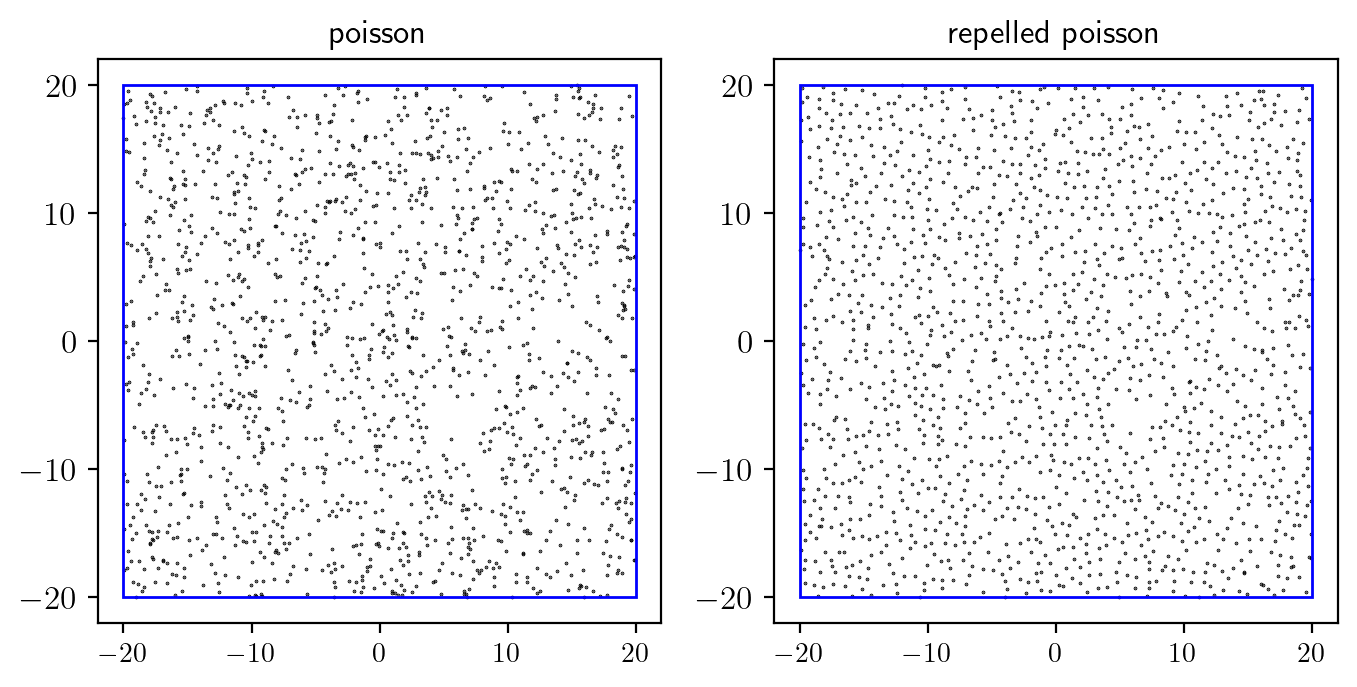

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
poisson_pp.plot(axis=ax[0], s=0.1)
repelled_poison_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[0], color="b")
window.plot(axis=ax[1], color="b")
ax[0].set_title("poisson")
ax[1].set_title("repelled poisson")
plt.show()

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:76: UserWarning: Method only available for centered ball or cubic window.
  warnings.warn("Method only available for centered ball or cubic window.")


nb_points poisson  1593  nb_points repelled= 1592


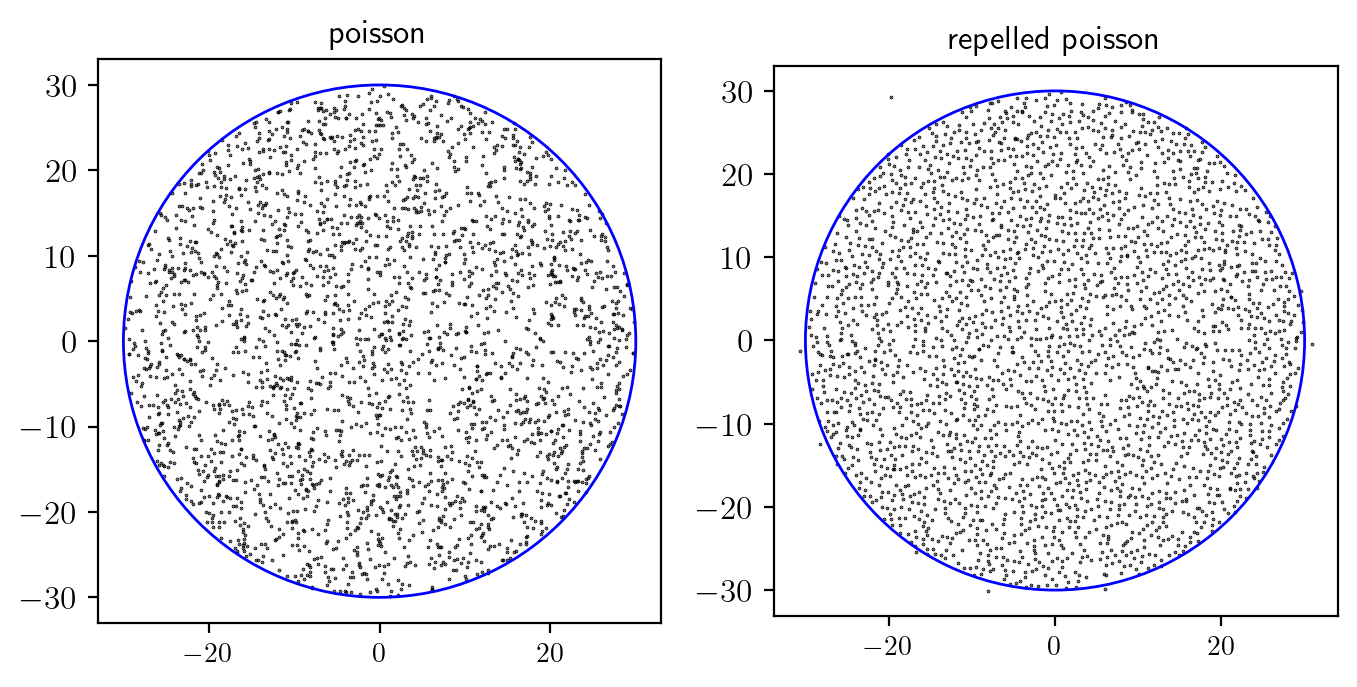

In [6]:
#option output=simulation show all simulated points 
#not restricted to the simulation window
window = BallWindow(center=[0,0], radius=30)
poisson_pp_, repelled_poison_pp_ = poisson.generate_repelled_point_pattern(window, seed=1, output="simulation", nb_cores=4)
print("nb_points poisson ", poisson_pp.points.shape[0], 
      " nb_points repelled=", repelled_poison_pp.points.shape[0])
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
poisson_pp_.plot(axis=ax[0], s=0.1)
ax[0].set_title("poisson")
repelled_poison_pp_.plot(axis=ax[1], s=0.1)
ax[1].set_title("repelled poisson")
window.plot(axis=ax[0], color="b")
window.plot(axis=ax[1], color="b")
plt.show()

# 2- Repelled Binomial point process

In [7]:
from mcrppy.point_processes import BinomialPointProcess

binomial = BinomialPointProcess()

window = BallWindow(center=[0,0], radius=50)
nb_points = 1000
binomial_pp, repelled_binomial_pp = binomial.generate_repelled_point_pattern(nb_points, window, seed=1, nb_cores=4)
print("nb_points binomial ", binomial_pp.points.shape[0], 
      " nb_points repelled=", repelled_binomial_pp.points.shape[0])

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:316: UserWarning: Method only available for centered ball or box window.
  warnings.warn("Method only available for centered ball or box window.")


nb_points binomial  1000  nb_points repelled= 993


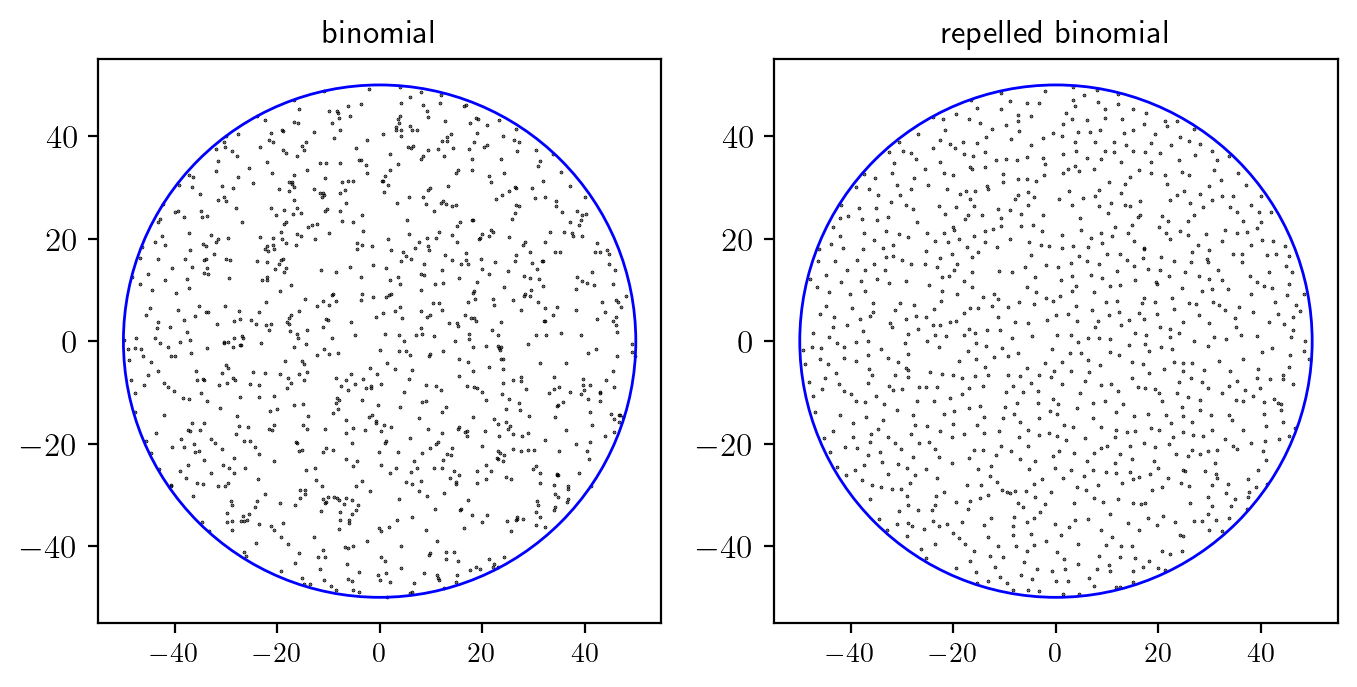

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
binomial_pp.plot(axis=ax[0], s=0.1)
repelled_binomial_pp.plot(axis=ax[1], s=0.1)
ax[0].set_title("binomial")
ax[1].set_title("repelled binomial")
window.plot(axis=ax[0], color="b")
window.plot(axis=ax[1], color="b")
plt.show()

# 3- Repelled Ginibre point process

In [9]:
from mcrppy.point_processes import GinibrePointProcess

ginibre = GinibrePointProcess()


window = BallWindow(center=[0,0], radius=40)
ginibre_pp, repelled_ginibre_pp = ginibre.generate_repelled_point_pattern(window=window, seed=1, nb_cores=4, output="simulation")
print("nb_points ginibre ", ginibre_pp.points.shape[0], 
      " nb_points repelled=", repelled_ginibre_pp.points.shape[0])

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:246: UserWarning: Method only available for centered ball or cubic window.
  warnings.warn("Method only available for centered ball or cubic window.")


nb_points ginibre  1583  nb_points repelled= 1583


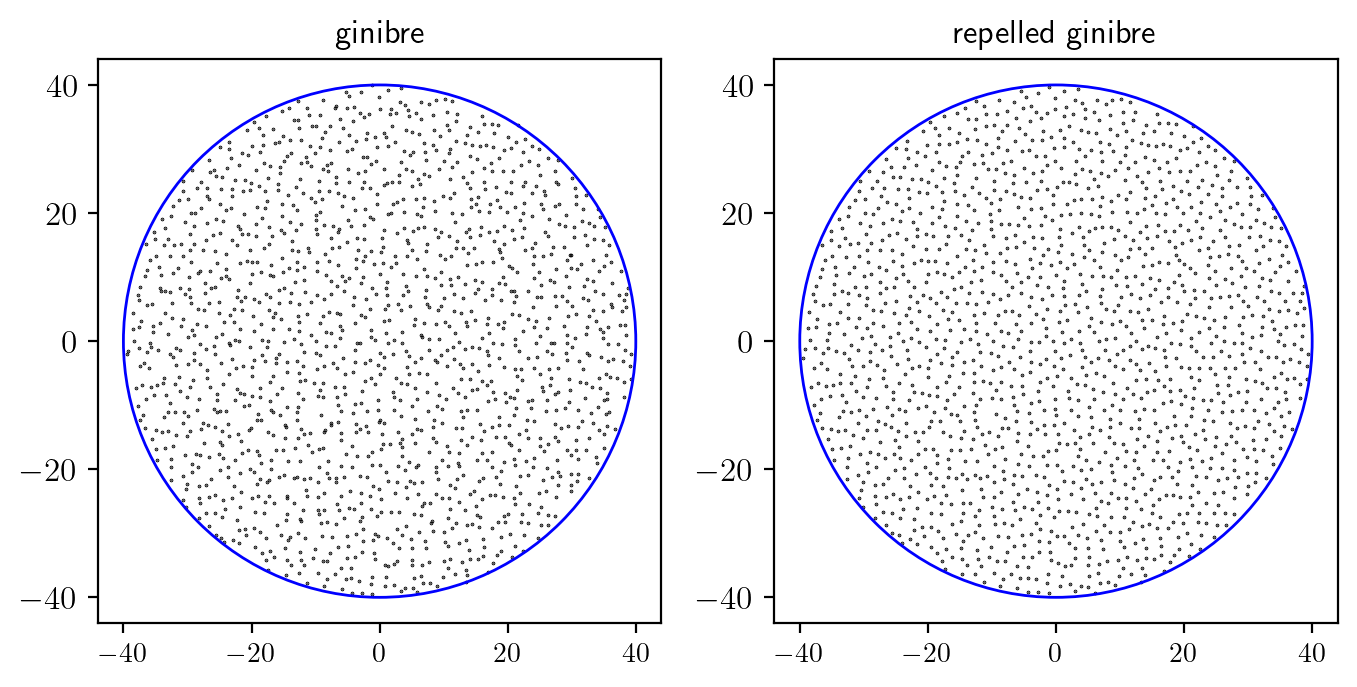

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ginibre_pp.plot(axis=ax[0], s=0.1)
repelled_ginibre_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[0], color="b")
window.plot(axis=ax[1], color="b")
ax[0].set_title("ginibre")
ax[1].set_title("repelled ginibre")
plt.show()

# 4- Scramble Sobol point process

In [11]:
from mcrppy.point_processes import ScrambleSobolPointProcess

sobol = ScrambleSobolPointProcess()

nb_points=1000
window = BallWindow(center=[0,0], radius=50)
sobol_pp, repelled_sobol_pp = sobol.generate_repelled_point_pattern(window=window, nb_points=nb_points, seed=1, nb_cores=4, output="simulation")
print("nb_points sobol ", sobol_pp.points.shape[0], 
      " nb_points repelled=", repelled_sobol_pp.points.shape[0])

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:284: UserWarning: Method only available for centered ball or box window.
  warnings.warn("Method only available for centered ball or box window.")
/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:268: UserWarning: The obtained number of points is not `nb_points`. The points are sampled in a BoxWindow of lenghtside equal the diameter of the window then a restriction is made to get the points in the support window.
  warnings.warn("The obtained number of points is not `nb_points`. The points are sampled in a BoxWindow of lenghtside equal the diameter of the window then a restriction is made to get the points in the support window.")
/Users/dhawat/Library/Caches/pypoetry/virtualenvs/gppy-NPWlgsrS-py3.9/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance 

nb_points sobol  999  nb_points repelled= 999


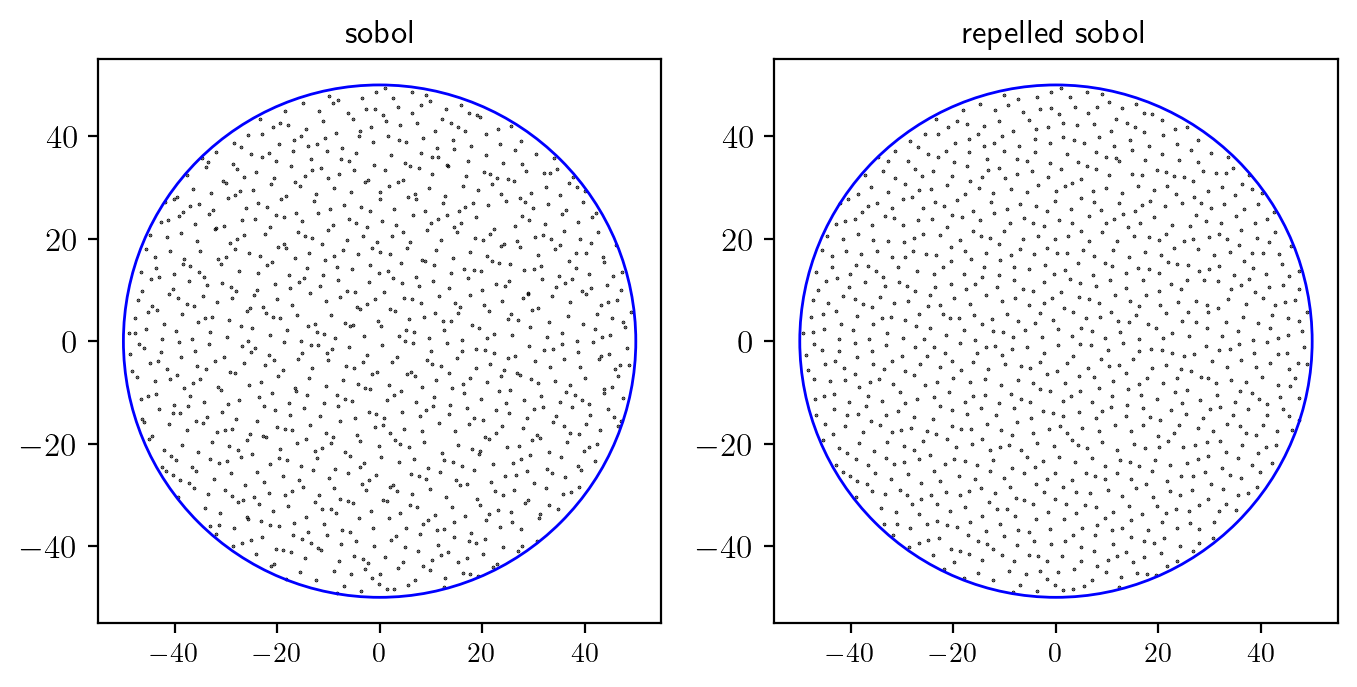

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sobol_pp.plot(axis=ax[0], s=0.1)
window.plot(axis=ax[0], color="b")
repelled_sobol_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[1], color="b")
ax[0].set_title("sobol")
ax[1].set_title("repelled sobol")
plt.show()

nb_points sobol  1606  nb_points repelled= 1606


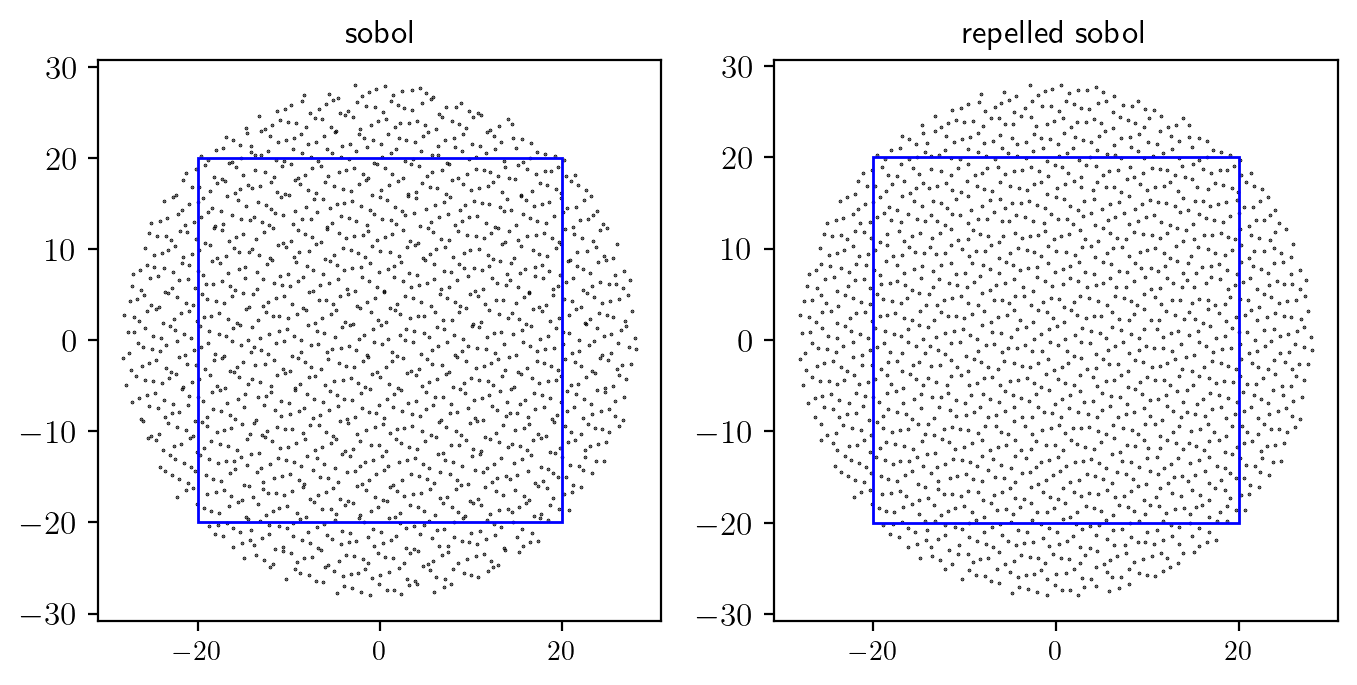

In [13]:
from mcrppy.point_processes import ScrambleSobolPointProcess

sobol = ScrambleSobolPointProcess()

nb_points=2**(10)
window = BoxWindow([[-20,20], [-20,20]])
sobol_pp, repelled_sobol_pp = sobol.generate_repelled_point_pattern(window=window, nb_points=nb_points, seed=1, nb_cores=4, output="simulation")
print("nb_points sobol ", sobol_pp.points.shape[0], 
      " nb_points repelled=", repelled_sobol_pp.points.shape[0])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sobol_pp.plot(axis=ax[0], s=0.1)
window.plot(axis=ax[0], color="b")
repelled_sobol_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[1], color="b")
ax[0].set_title("sobol")
ax[1].set_title("repelled sobol")
plt.show()

nb_points sobol  1023  nb_points repelled= 1017


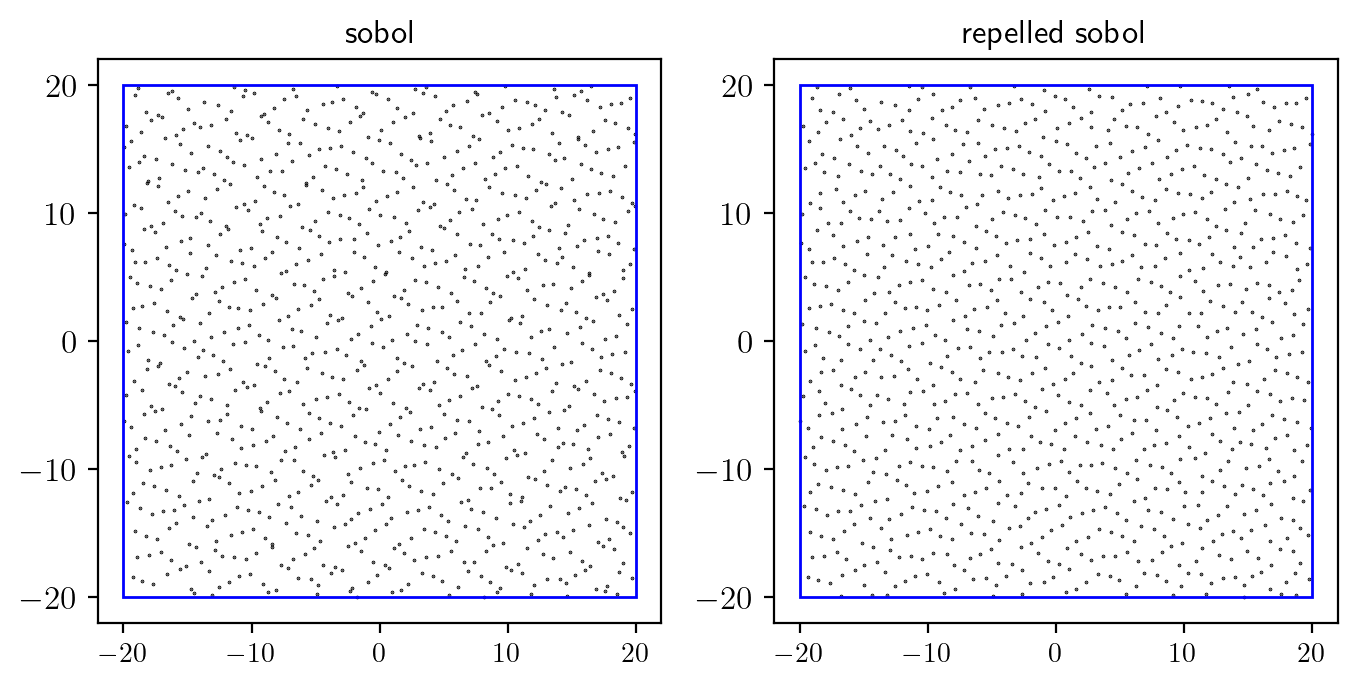

In [14]:
from mcrppy.point_processes import ScrambleSobolPointProcess

sobol = ScrambleSobolPointProcess()

nb_points=2**(10)
window = BoxWindow([[-20,20], [-20,20]])
sobol_pp, repelled_sobol_pp = sobol.generate_repelled_point_pattern(window=window, nb_points=nb_points, seed=1, nb_cores=4,)
print("nb_points sobol ", sobol_pp.points.shape[0], 
      " nb_points repelled=", repelled_sobol_pp.points.shape[0])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sobol_pp.plot(axis=ax[0], s=0.1)
window.plot(axis=ax[0], color="b")
repelled_sobol_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[1], color="b")
ax[0].set_title("sobol")
ax[1].set_title("repelled sobol")
plt.show()

# 5- Repelled Thomas point process

In [15]:
from mcrppy.point_processes import ThomasPointProcess

thomas = ThomasPointProcess(kappa=1/2, mu=1, sigma=2)

window = BallWindow(center=[0,0], radius=50)
thomas_pp, repelled_thomas_pp = thomas.generate_repelled_point_pattern(window=window, seed=1, nb_cores=4, output="simulation")
print("nb_points thomas ", thomas_pp.points.shape[0], 
      " nb_points repelled=", repelled_thomas_pp.points.shape[0])

/Users/dhawat/github/gravity_process/GravityPointProcess/src/mcrppy/point_processes.py:145: UserWarning: Method only available for centered ball or cubic window.
  warnings.warn("Method only available for centered ball or cubic window.")


nb_points thomas  3878  nb_points repelled= 3878


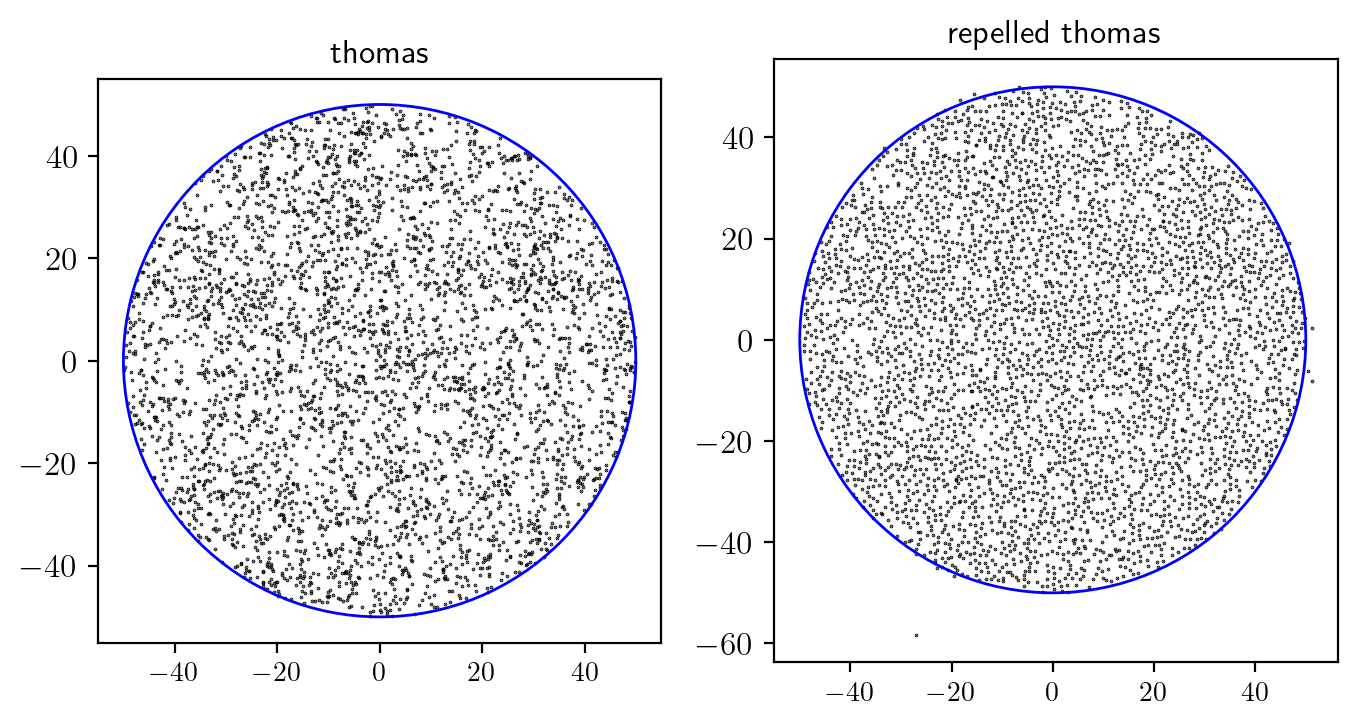

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
thomas_pp.plot(axis=ax[0], s=0.1)
window.plot(axis=ax[0], color="b")
repelled_thomas_pp.plot(axis=ax[1], s=0.1)
window.plot(axis=ax[1], color="b")
ax[0].set_title("thomas")
ax[1].set_title("repelled thomas")
plt.show()